In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geodesic.curve_shorten import compute_geodesic
from geodesic.geometry import Curve
from mpl_toolkits import mplot3d

sns.set()

In [77]:
def surface(alpha, ys):
    return np.exp(-alpha * np.abs(ys))

In [66]:
zs.shape

(100,)

In [73]:
np.broadcast_to(zs.reshape(1, -1), (len(xs), len(ys)))[1]

array([1.73325302, 1.71410125, 1.6951611 , 1.67643023, 1.65790632,
       1.6395871 , 1.62147031, 1.60355369, 1.58583505, 1.56831219,
       1.55098295, 1.53384519, 1.5168968 , 1.50013568, 1.48355976,
       1.467167  , 1.45095538, 1.43492289, 1.41906755, 1.4033874 ,
       1.38788052, 1.37254498, 1.35737889, 1.34238038, 1.3275476 ,
       1.31287872, 1.29837192, 1.28402542, 1.26983744, 1.25580623,
       1.24193006, 1.22820721, 1.214636  , 1.20121475, 1.18794179,
       1.1748155 , 1.16183424, 1.14899643, 1.13630046, 1.12374479,
       1.11132784, 1.0990481 , 1.08690405, 1.07489418, 1.06301702,
       1.0512711 , 1.03965496, 1.02816718, 1.01680633, 1.00557102,
       0.99445985, 0.98347145, 0.97260448, 0.96185758, 0.95122942,
       0.94071871, 0.93032413, 0.92004441, 0.90987828, 0.89982448,
       0.88988177, 0.88004892, 0.87032473, 0.86070798, 0.85119749,
       0.84179209, 0.83249061, 0.82329192, 0.81419486, 0.80519832,
       0.7963012 , 0.78750238, 0.77880078, 0.77019534, 0.76168

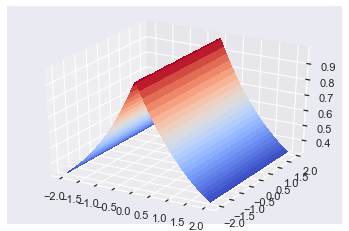

In [83]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
resolution = 100
xs = np.linspace(-2, 2, resolution)
ys = xs
zs = surface(alphas[0], ys)
xs, ys = np.meshgrid(xs, ys)
ax.plot_surface(xs, ys, np.broadcast_to(zs.reshape(1, -1),(len(xs), len(ys))), cmap='coolwarm', linewidth=0, antialiased=False)

In [28]:
def analytic_exponential_geodesic(xs, alpha):
    return (1 / alpha) * np.log(np.cos(alpha * xs) / np.cos(alpha))

In [50]:
def compute_exponential_geodesic(alpha, global_nodes=16, local_nodes=8, max_node_movement=1e-3):
    dimension = 2

    # Create start and end point NumPy arrays
    start_point = np.zeros(dimension)
    start_point[0] = -1

    end_point = np.zeros(dimension)
    end_point[0] = 1

    # Create constant vector n
    n = alpha * np.ones(dimension)
    n[0] = 0

    # Define function to describe metric coefficient
    def metric_coefficient(x):
        return np.exp(-np.inner(n, x))

    def metric_coefficient_gradient(x):
        return -n * np.exp(-np.inner(n, x))

    # Create curve object for calculation
    curve = Curve(start_point, end_point, global_nodes)

    # Apply curve shortening procedure to minimise length
    compute_geodesic(
        curve,
        local_num_nodes=local_nodes,
        tol=max_node_movement,
        metric=metric_coefficient,
        grad_metric=metric_coefficient_gradient,
        processes=1
    )

    return curve.get_points()

In [42]:
alphas = [0.55, 0.65, 0.75, 0.85]

In [51]:
approximations = {
    alpha: compute_exponential_geodesic(alpha) for alpha in alphas
}

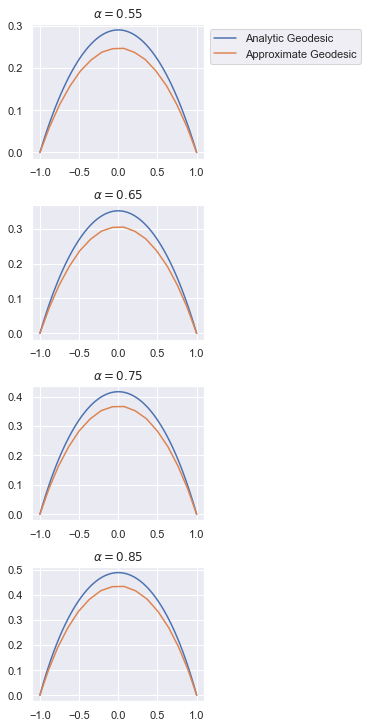

In [54]:
xs = np.linspace(-1, 1, 100)
fig, axs = plt.subplots(len(alphas), 1, figsize=(5, 10), constrained_layout=True)
for ax, alpha in zip(axs, alphas):
    ax.set_title(f'$\\alpha = {alpha}$')
    ax.plot(xs, analytic_exponential_geodesic(xs, alpha=alpha), label="Analytic Geodesic")
    ax.plot(approximations[alpha][:, 0], approximations[alpha][:, 1], label="Approximate Geodesic")
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1))